# Quickstart

A quick introduction on how to use the OQuPy package to compute the dynamics of a quantum system that is possibly strongly coupled to a structured environment. We illustrate this by applying the TEMPO method to the strongly coupled spin boson model.

- [launch binder](https://mybinder.org/v2/gh/tempoCollaboration/OQuPy/HEAD?labpath=tutorials%2Fquickstart.ipynb) (runs in browser),
- [download the jupyter file](https://raw.githubusercontent.com/tempoCollaboration/OQuPy/main/tutorials/quickstart.ipynb), or
- read through the text below and code along.

**Contents:**

* Example - The spin boson model
    * 1. The model and its parameters
    * 2. Create system, correlations and bath objects
    * 3. TEMPO computation

First, let's import OQuPy and some other packages we are going to use

In [1]:
import sys
sys.path.insert(0,'..')

import oqupy
import numpy as np
import matplotlib.pyplot as plt

and check what version of tempo we are using.

In [2]:
oqupy.__version__

'0.5.0'

Let's also import some shorthands for the spin Pauli operators and density matrices.

In [3]:
sigma_x = oqupy.operators.sigma("x")
sigma_y = oqupy.operators.sigma("y")
sigma_z = oqupy.operators.sigma("z")
up_density_matrix = oqupy.operators.spin_dm("z+")
down_density_matrix = oqupy.operators.spin_dm("z-")

-------------------------------------------------
## Example - The spin boson model
As a first example let's try to reconstruct one of the lines in figure 2a of [Strathearn2018] ([Nat. Comm. 9, 3322 (2018)](https://doi.org/10.1038/s41467-018-05617-3) / [arXiv:1711.09641v3](https://arxiv.org/abs/1711.09641)). In this example we compute the time evolution of a spin which is strongly coupled to an ohmic bath (spin-boson model). Before we go through this step by step below, let's have a brief look at the script that will do the job - just to have an idea where we are going:

--> TEMPO computation:
100.0%  150 of  150 [########################################] 00:00:03
Elapsed time: 3.9s


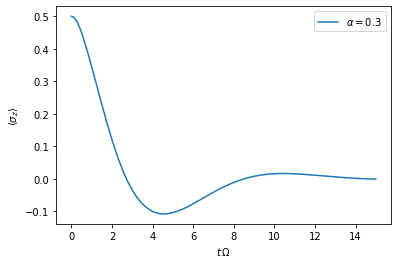

In [4]:
Omega = 1.0
omega_cutoff = 5.0
alpha = 0.3

system = oqupy.System(0.5 * Omega * sigma_x)
correlations = oqupy.PowerLawSD(alpha=alpha,
                                zeta=1,
                                cutoff=omega_cutoff,
                                cutoff_type='exponential')
bath = oqupy.Bath(0.5 * sigma_z, correlations)
tempo_parameters = oqupy.TempoParameters(dt=0.1, tcut=3.0, epsrel=10**(-4))

dynamics = oqupy.tempo_compute(system=system,
                               bath=bath,
                               initial_state=up_density_matrix,
                               start_time=0.0,
                               end_time=15.0,
                               parameters=tempo_parameters,
                               unique=False)
t, s_z = dynamics.expectations(0.5*sigma_z, real=True)

plt.plot(t, s_z, label=r'$\alpha=0.3$')
plt.xlabel(r'$t\,\Omega$')
plt.ylabel(r'$\langle\sigma_z\rangle$')
plt.legend()

### 1. The model and its parameters 
We consider a system Hamiltonian
$$ H_{S} = \frac{\Omega}{2} \hat{\sigma}_x \mathrm{,}$$
a bath Hamiltonian
$$ H_{B} = \sum_k \omega_k \hat{b}^\dagger_k \hat{b}_k  \mathrm{,}$$
and an interaction Hamiltonian
$$ H_{I} =  \frac{1}{2} \hat{\sigma}_z \sum_k \left( g_k \hat{b}^\dagger_k + g^*_k \hat{b}_k \right) \mathrm{,}$$
where $\hat{\sigma}_i$ are the Pauli operators, and the $g_k$ and $\omega_k$ are such that the spectral density $J(\omega)$ is
$$ J(\omega) = \sum_k |g_k|^2 \delta(\omega - \omega_k) = 2 \, \alpha \, \omega \, \exp\left(-\frac{\omega}{\omega_\mathrm{cutoff}}\right) \mathrm{.} $$
Also, let's assume the initial density matrix of the spin is the up state
$$ \rho(0) = \begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix} $$
and the bath is initially at zero temperature.

For the numerical simulation it is advisable to choose a characteristic frequency and express all other physical parameters in terms of this frequency. Here, we choose $\Omega$ for this and write:
    
* $\Omega = 1.0 \Omega$
* $\omega_c = 5.0 \Omega$
* $\alpha = 0.3$

In [5]:
Omega = 1.0
omega_cutoff = 5.0
alpha = 0.3

### 2. Create system, correlations and bath objects

#### System
$$ H_{S} = \frac{\Omega}{2} \hat{\sigma}_x \mathrm{,}$$

In [6]:
system = oqupy.System(0.5 * Omega * sigma_x)

#### Correlations
$$ J(\omega) = 2 \, \alpha \, \omega \, \exp\left(-\frac{\omega}{\omega_\mathrm{cutoff}}\right) $$

Because the spectral density is of the standard power-law form,
$$ J(\omega) = 2 \alpha \frac{\omega^\zeta}{\omega_c^{\zeta-1}} X(\omega,\omega_c) $$
with $\zeta=1$ and $X$ of the type ``'exponential'`` we define the spectral density with:

In [7]:
correlations = oqupy.PowerLawSD(alpha=alpha,
                                  zeta=1,
                                  cutoff=omega_cutoff,
                                  cutoff_type='exponential')

#### Bath
The bath couples with the operator $\frac{1}{2}\hat{\sigma}_z$ to the system.

In [8]:
bath = oqupy.Bath(0.5 * sigma_z, correlations)

### 3. TEMPO computation
Now, that we have the system and the bath objects ready we can compute the dynamics of the spin starting in the up state, from time $t=0$ to $t=5\,\Omega^{-1}$

In [9]:
dynamics_1 = oqupy.tempo_compute(system=system,
                                   bath=bath,
                                   initial_state=up_density_matrix,
                                   start_time=0.0,
                                   end_time=5.0,
                                   tolerance=0.01,
                                   unique=False)

../oqupy/tempo.py:881: UserWarning: Estimating parameters for TEMPO computation. No guarantee that resulting TEMPO computation converges towards the correct dynamics! Please refer to the TEMPO documentation and check convergence by varying the parameters for TEMPO manually.
  warnings.warn(GUESS_WARNING_MSG, UserWarning)


--> TEMPO computation:
100.0%   80 of   80 [########################################] 00:00:01
Elapsed time: 2.0s


and plot the result:

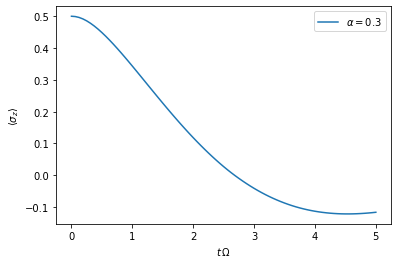

In [10]:
t_1, z_1 = dynamics_1.expectations(0.5*sigma_z, real=True)
plt.plot(t_1, z_1, label=r'$\alpha=0.3$')
plt.xlabel(r'$t\,\Omega$')
plt.ylabel(r'$\langle\sigma_z\rangle$')
plt.legend()

Yay! This looks like the plot in figure 2a [Strathearn2018].

**Note:** with the option `unique=True` an attempt is made to simplify the
calculation by checking for degeneracies in the eigensystem of the bath coupling operator. This may greatly decrease the computation time without significant loss of accuracy. This feature is currently in testing, so if used we recommend checking results against those obtained with `unqiue=False` (the default).

We should also address the warning that was given in the above computation:

```
WARNING: Estimating parameters for TEMPO computation. No guarantee that resulting TEMPO computation converges towards the correct dynamics! Please refer to the TEMPO documentation and check convergence by varying the parameters for TEMPO manually.
```
We got this message because we didn't tell the package what parameters to use for the TEMPO computation, but instead only specified a `tolerance`. The package tries it's best by implicitly calling the function `oqupy.guess_tempo_parameters()` to find parameters that are appropriate for the spectral density and system objects given.

#### TEMPO Parameters

There are **three key parameters** to a TEMPO computation:

* `dt` - Length of a time step $\delta t$ - It should be small enough such that a trotterisation between the system Hamiltonian and the environment it valid, and the environment auto-correlation function is reasonably well sampled.
    
* `tcut` (or `dkmax`) - Memory cut-off time (or number of steps). It must be large enough to capture all non-Markovian effects of the environment.

* `epsrel` - The maximal relative error $\epsilon_\mathrm{rel}$ in the singular value truncation - It must be small enough such that the numerical compression (using tensor network algorithms) does not truncate relevant correlations.

To choose the right set of initial parameters, we recommend to first use the `oqupy.guess_tempo_parameters()` function and then check with the helper function `oqupy.helpers.plot_correlations_with_parameters()` whether it satisfies the above requirements:

In [11]:
parameters = oqupy.guess_tempo_parameters(system=system,
                                          bath=bath,
                                          start_time=0.0,
                                          end_time=5.0,
                                          tolerance=0.01)
print(parameters)

../oqupy/tempo.py:881: UserWarning: Estimating parameters for TEMPO computation. No guarantee that resulting TEMPO computation converges towards the correct dynamics! Please refer to the TEMPO documentation and check convergence by varying the parameters for TEMPO manually.
  warnings.warn(GUESS_WARNING_MSG, UserWarning)


----------------------------------------------
TempoParameters object: Roughly estimated parameters
 Estimated with 'guess_tempo_parameters()'
  dt                   = 0.0625 
  tcut [dkmax]         = 2.25 [36] 
  epsrel               = 2.4846963223857106e-05 
  add_correlation_time = None 



<AxesSubplot:>

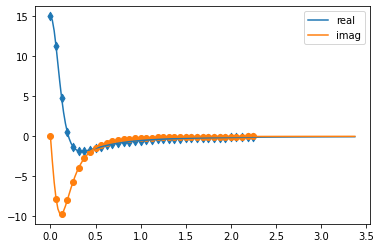

In [12]:
fig, ax = plt.subplots(1,1)
oqupy.helpers.plot_correlations_with_parameters(bath.correlations, parameters, ax=ax)

In this plot you see the real and imaginary part of the environments auto-correlation as a function of the delay time $\tau$ and the sampling of it corresponding the the chosen parameters. Sampling points with spacing `dt` are given up to time `tcut` (`dkmax` points). We can see that the auto-correlation function is close to zero for delay times larger than approx $2 \Omega^{-1}$ and that the sampling points follow the curve reasonably well. Thus this is a reasonable set of parameters.

We can choose a set of parameters by hand and bundle them into a `TempoParameters` object,

In [13]:
tempo_parameters = oqupy.TempoParameters(dt=0.1, tcut=3.0, epsrel=10**(-4), name="my rough parameters")
print(tempo_parameters)

----------------------------------------------
TempoParameters object: my rough parameters
 __no_description__
  dt                   = 0.1 
  tcut [dkmax]         = 3.0 [30] 
  epsrel               = 0.0001 
  add_correlation_time = None 



and check again with the helper function:

<AxesSubplot:>

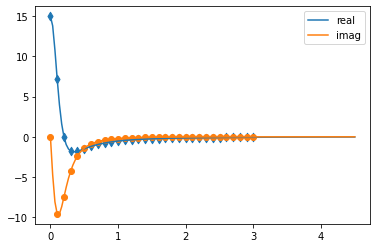

In [14]:
fig, ax = plt.subplots(1,1)
oqupy.helpers.plot_correlations_with_parameters(bath.correlations, tempo_parameters, ax=ax)

We could feed this object into the `oqupy.tempo_compute()` function to get the dynamics of the system. However, instead of that, we can split up the work that `oqupy.tempo_compute()` does into several steps, which allows us to resume a computation to get later system dynamics without having to start over. For this we start with creating a `Tempo` object:

In [15]:
tempo = oqupy.Tempo(system=system,
                      bath=bath,
                      parameters=tempo_parameters,
                      initial_state=up_density_matrix,
                      start_time=0.0,
                      unique=False)

We can start by computing the dynamics up to time $5.0\,\Omega^{-1}$,

In [16]:
tempo.compute(end_time=5.0)

--> TEMPO computation:
100.0%   50 of   50 [########################################] 00:00:00
Elapsed time: 0.6s


then get and plot the dynamics of expecatation values,

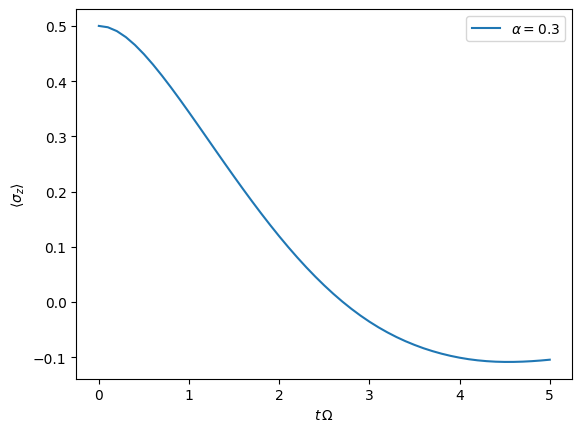

In [17]:
dynamics_2 = tempo.get_dynamics()
plt.plot(*dynamics_2.expectations(0.5*sigma_z, real=True), label=r'$\alpha=0.3$')
plt.xlabel(r'$t\,\Omega$')
plt.ylabel(r'$\langle\sigma_z\rangle$')
plt.legend()

then continue the computation to $15.0\,\Omega^{-1}$,

In [18]:
tempo.compute(end_time=15.0)

--> TEMPO computation:
100.0%  100 of  100 [########################################] 00:00:02
Elapsed time: 2.4s


and then again get and plot the dynamics of expecatation values.

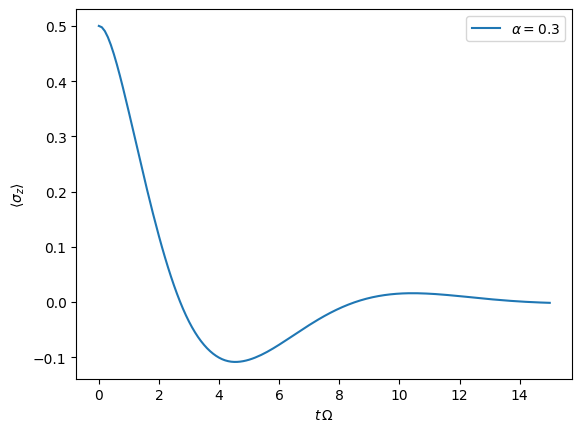

In [19]:
dynamics_2 = tempo.get_dynamics()
plt.plot(*dynamics_2.expectations(0.5*sigma_z, real=True), label=r'$\alpha=0.3$')
plt.xlabel(r'$t\,\Omega$')
plt.ylabel(r'$\langle\sigma_z\rangle$')
plt.legend()

Finally, we note: to validate the accuracy the result **it vital to check the convergence of such a simulation by varying all three computational parameters!** For this we recommend repeating the same simulation with slightly "better" parameters (smaller `dt`, larger `tcut`, smaller `epsrel`) and to consider the difference of the result as an estimate of the upper bound of the accuracy of the simulation.

-------------------------------------------------